In [1]:
import warnings
warnings.filterwarnings("ignore")
from lale.lib.lale import NoOp
from lale.lib.sklearn import KNeighborsClassifier
from lale.lib.sklearn import LogisticRegression
from lale.lib.sklearn import Nystroem
from lale.lib.sklearn import PCA
from lale.operators import make_union, make_choice, make_pipeline
from lale.helpers import to_graphviz

#### Lale provides an `|` combinator or a function make_choice() to allow only one of its arguments to be applied at once in the overall pipeline. In this example, the first step of the pipeline is a choice between Nystroem and NoOp. This means that the data will either be transformed using Nystroem or will be left as is (NoOp is a transformer that does nothing). The second step in the pipeline is a PCA, and the third step is again a choice between two popular classifiers.

In [2]:
kernel_tfm_or_not =  NoOp | Nystroem
#kernel_tfm_or_not.to_graphviz()

In [3]:
tfm = PCA

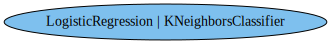

In [4]:
clf = make_choice(LogisticRegression, KNeighborsClassifier)
to_graphviz(clf)

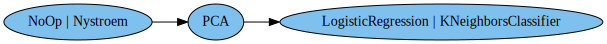

In [5]:
optimizable = kernel_tfm_or_not >> tfm >> clf
to_graphviz(optimizable)

#### Use the graph to select the best performing model for a dataset. We use Iris dataset from sklearn for this demonstration. Hyperopt is used to scan the hyperparameter search space and select the best performing path from the above graph. 

In [6]:
from lale.lib.lale.hyperopt_classifier import HyperoptClassifier
from lale.datasets import load_iris_df

(X_train, y_train), (X_test, y_test) = load_iris_df()

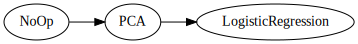

In [7]:
optimizer = HyperoptClassifier(model=optimizable, max_evals=1)
trained = optimizer.fit(X_train, y_train)
to_graphviz(trained)